<a href="https://colab.research.google.com/github/bruna-capistrano/Inferencia-Estatitica/blob/main/IE_Trabalho3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluna: Bruna Eduarda Rigueira Capistrano Matr.: 1815642BCC

# **Inferência Estatística (2020.2)**

##**Trabalho 03**


---



#1 Testes de hipóteses - uma amostra

Nessa parte do trabalho você deve verificar a alegação de que a máquina
está desregulada, conforme a suspeita do fabricante. Formule as hipóteses nula e
alternativa. Apresente sua análise para o nível de confiança 95%.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import t
from scipy.stats import zscore
import random

In [2]:
amostra = np.array([484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 
                   501.59, 502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27])
n = 20

mu_0 = 500
nu = n-1

x_bar = np.mean(amostra)
print("Média da amostra de garrafas: %.4f" % x_bar)

s = np.std(amostra, ddof=1)
print("Desvio padrão da amostra de garrafas: %.4f" % s)

t_score = (x_bar - mu_0)/(s/np.sqrt(n))
print("t-escore: %.4f" % t_score)

#teste unicaudal
pvalue = t.cdf(t_score, df=nu)
print("p-valor: %.4f" % pvalue)



Média da amostra de garrafas: 491.5705
Desvio padrão da amostra de garrafas: 24.7937
t-escore: -1.5205
p-valor: 0.0724


Como se trata de um caso em que o desvio padrão ($\sigma$) é desconhecido, foi ultizado o t-teste. As hipóteses são:
- $H_0: \mu = 500$
- $H_a: \mu < 500$

Da hipótese alternativa, observa-se que o teste é unicaudal, *i.e.*, da área da cauda à esquerda de -t. 

O nível de confiança estabelecido é de 95%, portanto, $\alpha$ = 5%. O p-valor $p$ > $\alpha$; logo, não é possível rejeitar a hipótese nula. Em outras palavras, não há evidência para confirmar as suspeitas do fabricante de que a máquina está desregulada.

#2 Testes de hipóteses - teste t-pareado

Nessa parte do trabalho, sua tarefa inicial é calcular o valor p (p-value) de cada uma das comparações possíveis entre o método CutSenti e as três variantes do MinCut. Após esse cálculo, realize uma análise dos valores obtidos. Nessa análise, descreva se é possível afirmar, no nível de significância $\alpha$ = 0.01, que há alguma diferença estatisticamente significante entre o método CutSenti e cada variante do MinCut. Formule e apresente as hipóteses nula e alternativa correspondentes.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CutSenti.csv to CutSenti.csv


In [4]:
import pandas as pd
df_cutsenti = pd.read_csv('CutSenti.csv', sep =';')
df_cutsenti.head()

,CutSenti,MinCut_T1_C,MinCut_T1_C2,MinCut_T1_Exp
0,83.1,82.65,82.85,82.85
1,83.1,82.30,82.60,82.60
2,83.1,82.70,82.70,82.60
3,82.9,82.70,82.80,82.70
4,82.8,82.70,82.80,82.80


In [5]:
from scipy import stats
def look_at_data(dataset):
    print(dataset.info())
    print(dataset.shape)
look_at_data(df_cutsenti)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CutSenti       11 non-null     float64
 1   MinCut_T1_C    11 non-null     float64
 2   MinCut_T1_C2   11 non-null     float64
 3   MinCut_T1_Exp  11 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes
None
(11, 4)


In [6]:
cutSenti = df_cutsenti.CutSenti
minCut_T1_C	= df_cutsenti.MinCut_T1_C
minCut_T1_C2 = df_cutsenti.MinCut_T1_C2
minCut_T1_Exp = df_cutsenti.MinCut_T1_Exp

Inicialmente, verificando a média de cada método, percebe-se que os valores se aproximam, porém há diferenças, que podem ser relevantes em se tratando de precisão de métodos computacionais.

In [11]:
print(cutSenti.mean())
print(minCut_T1_C.mean()) 
print(minCut_T1_C2.mean())
print(minCut_T1_Exp.mean()) 


83.0318181818182
82.49545454545454
82.55
82.50454545454545


In [8]:
delta_cS_C = cutSenti - minCut_T1_C
delta_cS_C2 = cutSenti - minCut_T1_C2
delta_cS_Exp = cutSenti - minCut_T1_Exp

print(delta_cS_C)
print(delta_cS_C2)
print(delta_cS_Exp)

0     0.45
1     0.80
2     0.40
3     0.20
4     0.10
5     0.90
6     0.40
7     0.80
8     0.80
9     0.40
10    0.65
dtype: float64
0     0.25
1     0.50
2     0.40
3     0.10
4     0.00
5     0.90
6     0.30
7     0.70
8     0.80
9     0.50
10    0.85
dtype: float64
0     0.25
1     0.50
2     0.50
3     0.20
4     0.00
5     0.90
6     0.60
7     0.80
8     0.80
9     0.50
10    0.75
dtype: float64


In [9]:
n = len(cutSenti)
nu = n - 1
mu_d = 0

x_bar_C = np.mean(delta_cS_C)
x_bar_C2 = np.mean(delta_cS_C2)
x_bar_Exp = np.mean(delta_cS_Exp)
s_d_C = np.std(delta_cS_C, ddof=1)
s_d_C2 = np.std(delta_cS_C2, ddof=1)
s_d_Exp = np.std(delta_cS_Exp, ddof=1)

print("Média das diferenças do CutSenti em relação a MinCut T1 C: %.4f." % x_bar_C)
print("Média das diferenças do CutSenti em relação a MinCut T1 C2: %.4f." % x_bar_C2)
print("Média das diferenças do CutSenti em relação a MinCut T1 Exp: %.4f." % x_bar_Exp)

print("Desvio padrão das diferenças do CutSenti em relação a MinCut T1 C: %.4f." % s_d_C)
print("Desvio padrão das diferenças do CutSenti em relação a MinCut T1 C2: %.4f." % s_d_C2)
print("Desvio padrão das diferenças do CutSenti em relação a MinCut T1 Exp: %.4f." % s_d_Exp)


Média das diferenças do CutSenti em relação a MinCut T1 C: 0.5364.
Média das diferenças do CutSenti em relação a MinCut T1 C2: 0.4818.
Média das diferenças do CutSenti em relação a MinCut T1 Exp: 0.5273.
Desvio padrão das diferenças do CutSenti em relação a MinCut T1 C: 0.2684.
Desvio padrão das diferenças do CutSenti em relação a MinCut T1 C2: 0.3052.
Desvio padrão das diferenças do CutSenti em relação a MinCut T1 Exp: 0.2840.


In [10]:

t_d_C = (x_bar_C - mu_d)/(s_d_C/np.sqrt(n))
t_d_C2 = (x_bar_C2 - mu_d)/(s_d_C2/np.sqrt(n))
t_d_Exp = (x_bar_Exp - mu_d)/(s_d_Exp/np.sqrt(n))
print("Valor do t-escore do CutSenti em relação a MinCut T1 C: %.2f" % t_d_C)
print("Valor do t-escore do CutSenti em relação a MinCut T1 C2: %.2f" % t_d_C2)
print("Valor do t-escore do CutSenti em relação a MinCut T1 Exp: %.2f" % t_d_Exp)


Valor do t-escore do CutSenti em relação a MinCut T1 C: 6.63
Valor do t-escore do CutSenti em relação a MinCut T1 C2: 5.24
Valor do t-escore do CutSenti em relação a MinCut T1 Exp: 6.16


In [11]:

# repare que é um teste bicaudal
pvalue_C = 2 * t.cdf(-t_d_C, df=nu)
pvalue_C2 = 2 * t.cdf(-t_d_C2, df=nu)
pvalue_Exp = 2 * t.cdf(-t_d_Exp, df=nu)

print("p-value do CutSenti em relação ao MinCut T1 C: %.4f" % pvalue_C)
print("p-value do CutSenti em relação ao MinCut T1 C2: %.4f" % pvalue_C2)
print("p-value do CutSenti em relação ao MinCut T1 Exp: %.4f" % pvalue_Exp)

p-value do CutSenti em relação ao MinCut T1 C: 0.0001
p-value do CutSenti em relação ao MinCut T1 C2: 0.0004
p-value do CutSenti em relação ao MinCut T1 Exp: 0.0001



Para este caso, a hipótese nula é de que não existem diferenças estatisticamente significantes entre as varintes do método computacional MinCut e o CutSenti. 
- $H_0: \mu_d = 0$
- $H_a: \mu_d \neq 0$

Vamos usar o teste bicaudal (two-sided), para ser consistente com a questão de pesquisa. 
Os resultados de p-valor encontrados são menores do que o $\alpha$ estabelecido (0.01), de modo que é possível rejeitar a hipótese nula. Com isso, existem evidências para afirmar que há diferenças relevantes do ponto de vista estatístico entre o método computacional CurSenti e as três variantes do MinCut.

#3 Testes de hipóteses - teste t-independente

Presumindo que os dados da coluna mpg seguem a distribuição normal, determine um intervalo de confiança no nível 95% da diferença entre as médias dos modelos de carros que possuem transmissão automática e os que possuem transmissão manual.

In [7]:
from google.colab import files
uploaded = files.upload()

Saving mtcars.csv to mtcars.csv


In [8]:
import pandas as pd
df_mtcars = pd.read_csv('mtcars.csv', sep =',')
df_mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
from scipy import stats
def look_at_data(dataset):
    print(dataset.info())
    print(dataset.shape)
look_at_data(df_mtcars)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None
(32, 12)


In [17]:
automatic_mtCars = df_mtcars.query('am==0')['mpg']
manual_mtCars = df_mtcars.query('am==1')['mpg']

In [18]:
print(automatic_mtCars) #n = 19

3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
Name: mpg, dtype: float64


In [19]:
print(manual_mtCars) #n = 13

0     21.0
1     21.0
2     22.8
17    32.4
18    30.4
19    33.9
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64


In [24]:
def graus_lib(n_1, s_1, n_2, s_2):
  numerator = ((s_1*s_1)/n_1 + (s_2*s_2/n_2)) * ((s_1*s_1)/n_1 + ((s_2*s_2)/n_2))
  denominator = ((s_1*s_1/n_1)*(s_1*s_1/n_1))/(n_1-1) + ((s_2*s_2/n_2)*(s_2*s_2/n_2))/(n_2-1)
  return numerator / denominator

def erro_padrao(n_1, s_1, n_2, s_2):
  return np.sqrt((s_1*s_1)/n_1 + (s_2*s_2/n_2))

n_1 = len(manual_mtCars)
n_2 = len(automatic_mtCars)

x_bar_1 = np.mean(manual_mtCars)
s_1 = np.std(manual_mtCars, ddof=1)

x_bar_2 = np.mean(automatic_mtCars)
s_2 = np.std(automatic_mtCars, ddof=1)

print("Média das diferenças (carros manuais): %.4f." % x_bar_1)
print("Desvio padrão das diferenças (carros manuais): %.4f." % s_1)
print()
print("Média das diferenças (carros automáticos): %.4f." % x_bar_2)
print("Desvio padrão das diferenças (carros automáticos): %.4f." % s_2)

se = erro_padrao(n_1, s_1, n_2, s_2)

t_score = (x_bar_1 - x_bar_2)/se #*-1

print("Valor do t-escore: %.4f" % t_score)

nu = graus_lib(n_1, s_1, n_2, s_2)

print("Graus de liberdade: %.2f" % nu)

# repare que é um teste bicaudal
pvalue = 2 * t.cdf(-t_score, df=nu)

print("p-value: %.4f" % pvalue)

Média das diferenças (carros manuais): 24.3923.
Desvio padrão das diferenças (carros manuais): 6.1665.

Média das diferenças (carros automáticos): 17.1474.
Desvio padrão das diferenças (carros automáticos): 3.8340.
Valor do t-escore: 3.7671
Graus de liberdade: 18.33
p-value: 0.0014


Aqui, a hipótese nula é de que não há diferença entre a média de milhas por galão gastas por carros automáticos e por carros manuais. Enquanto a hipótese alternativa é de a diferença existe.
- $H_0: \mu_d = 0$
- $H_a: \mu_d \neq 0$

O p-valor encontrado, comparado a um $\alpha = 5$%, nos permite rejeitar a hipótese nula e afirmar que as diferenças entre as médias de quantidades de milhas por galão gastas pelos diversos modelos de carros é estatiticamente relevante quando se compara carros automáticos a carros manuais. 

In [31]:

# upper and lower bounds
delta = x_bar_1 - x_bar_2 
lb = delta - t.ppf(0.975,nu) * se 
ub = delta + t.ppf(0.975,nu) * se
print("Intervalo de confiança no nível de 95%% para a diferença entre as médias: (%.2f,%.2f)" % (lb, ub))

Intervalo de confiança no nível de 95% para a diferença entre as médias: (3.21,11.28)


Como o intervalo de confiança no nível de 95% inclui o 0, o teste bicaudal não rejeita a hipótese nula $H_0: \mu_d = 0$  a 5%. É necessário incluir o erro padrão no cálculo dos limites superior e inferior. 

O resultado nos permite afirmar que há 95% de confiança de que a média de milhas por galão gastas por carros manuais é entre 3.21 a 11.28 maior do que o gasto médio de carros automáticos. 

#4 Testes de hipóteses - ANOVA

Verifique se as amostras são aproximadamente normalmente
distribuídas. Utilize R ou Python para isso.
Calcule a variância da amostra para cada população de carros. Em seguida,
usando R ou Python, verifique se o método ANOVA pode ser usado nesses dados.
Agora as condições de normalidade e variância comum foram verificadas.
Sendo assim, use o ANOVA para testar se as populações têm média comum.
Declare as hipóteses nula e alternativa. A seguir, indique suas conclusões.

In [33]:
from google.colab import files
uploaded = files.upload()

Saving compactcars.csv to compactcars.csv


In [34]:
from google.colab import files
uploaded = files.upload()

Saving mediumcars.csv to mediumcars.csv


In [35]:
from google.colab import files
uploaded = files.upload()

Saving bigcars.csv to bigcars.csv


In [36]:
import pandas as pd
df_compactcars = pd.read_csv('compactcars.csv', sep =',')
df_compactcars.head()

,model,mpg
0,Audi 90,20
1,Chevy Cavalier,25
2,Chevy Corsica,25
3,Chrysler Lebaron,20
4,Dodge Spirit,22


In [38]:
df_mediumcars = pd.read_csv('mediumcars.csv', sep =',')
df_mediumcars.head()

,model,mpg
0,Acura Legend,18
1,Audi 100,19
2,BMW 535i,22
3,Buick Century,22
4,Buick Rivera,19


In [39]:
df_bigcars = pd.read_csv('bigcars.csv', sep =',')
df_bigcars.head()

,model,mpg
0,Buick LeSabre,19
1,Buick Roadmaster,16
2,Cadillac Deville,16
3,Chevy Caprice,17
4,Chrysler Concorde,20


Para aplicar o ANOVA, é necessário que as amostram sejam oriundas de uma população normal, por isso, foi aplicado o teste Shapiro

In [40]:
statistic ,pvalue = stats.shapiro(df_compactcars['mpg'])
print(pvalue)
statistic ,pvalue = stats.shapiro(df_mediumcars['mpg'])
print(pvalue)
statistic ,pvalue = stats.shapiro(df_bigcars['mpg'])
print(pvalue)

0.13663779199123383
0.46937882900238037
0.20412732660770416


Outra exigência para este método é a igualdade de variâncias entre as amostras.

In [42]:

import statistics as st
print(st.stdev(df_compactcars['mpg']))
print(st.stdev(df_mediumcars['mpg']))
print(st.stdev(df_bigcars['mpg']))


2.0330600909302543
1.8955404488096774
1.51744244666721


Teste bartlett para verificar a igualdade das variâncias entre as três amostras:

*   Hipotese Nula: Variâncias das amostras são iguais
*   Hipotese Alternativa: Pelo menos uma das variâncias é distinta




In [44]:

from scipy.stats import bartlett
stat, p = bartlett(df_compactcars['mpg'], df_mediumcars['mpg'],df_bigcars['mpg'])
print(p)

0.4617665928169624


Como p-valor > 0.05, não se rejeita a hipotese nula, portanto, aceita-se a igualdade das variâncias.

Uma primeira evidência da relação entre as médias entre as amostras:

In [47]:

print(df_compactcars['mpg'].mean())
print(df_mediumcars['mpg'].mean())
print(df_bigcars['mpg'].mean())

22.5
19.545454545454547
17.75


Após a verificação das condições de aplicabilidade (normalidade das amostras e igualdade da variâncias), podemos aplicar o ANOVA. 

In [46]:
from scipy.stats import f_oneway
compactcars = df_compactcars['mpg']
mediumcars = df_mediumcars['mpg']
bigcars = df_bigcars['mpg']

f_oneway(compactcars, mediumcars, bigcars)

F_onewayResult(statistic=30.64323773770957, pvalue=1.1426698001297824e-09)

O valor obtido para p nos leva a concluir que **não** podemos, no nível de significância de 5%, rejeitar a hipótese nula (que alega que as médias de milhas percorridas por galão nos três portes de carros são iguais).

#5 Teste $\chi^2$ 

 ## 5.1 Distribuição $\chi^2$ 

In [9]:
from scipy.stats import chi2

Suponha que uma variável aleatória Y siga a distribuição $\chi^2$  com k graus de liberdade, isto é, $Y \sim \chi^2_{(k)} $ . Por meio das funções apropriadas de R ou de Python, compute o que se pede a seguir. Considere que $k = 13$:

(i) $P(Y > 2,56)$

In [50]:
k = 13
y = 2.56
cdf_value = 1 - chi2.cdf(y, df=k)
print(cdf_value)

0.9991125857338248


(ii) $P(2,56 < Y < 4,87)$

In [52]:
cdf_value1 = chi2.cdf(2.56, df=k)
cdf_value2 = chi2.cdf(4.87, df=k)

print(cdf_value2 - cdf_value1)

0.021168183378387335


(iii) O valor de $y$ tal que, $P(Y < y) = 0,95$

In [61]:
 rv = chi2.ppf(.95, df=k)
 print(rv)

22.362032494826934


## 5.2 Teste $\chi^2$  (I)

Considere novamente o conjunto de dados denominado mtcars. Para este conjunto
de dados, descubra se as variáveis $cyl$ e $carb$ são ou não dependentes. Para isso, utilize o teste $\chi^2$. Apresente o desenvolvimento, isto é, os comandos em R ou Python que você utilizou para chegar à conclusão.

In [10]:
tbl = pd.crosstab(df_mtcars.cyl, df_mtcars.carb, margins=True)
tbl

carb,1,2,3,4,6,8,All
cyl,,,,,,,
4,5,6,0,0,0,0,11
6,2,0,0,4,1,0,7
8,0,4,3,6,0,1,14
All,7,10,3,10,1,1,32


Calcula-se a proporção total da variável de carb.
Caso nao exista associação, esta proporçao deveria se verificar entre cyl.

In [66]:
(pd.value_counts(df_mtcars['carb'])/len(df_mtcars))

4    0.31250
2    0.31250
1    0.21875
3    0.09375
8    0.03125
6    0.03125
Name: carb, dtype: float64

Calcula-se a proporção total de carb em cada cyl.

In [11]:
pd.crosstab(df_mtcars['cyl'],df_mtcars['carb']).apply(lambda r: r/r.sum(), axis=0)

carb,1,2,3,4,6,8
cyl,,,,,,
4,0.714286,0.6,0.0,0.0,0.0,0.0
6,0.285714,0.0,0.0,0.4,1.0,0.0
8,0.000000,0.4,1.0,0.6,0.0,1.0


* Hipótese Nula: Não há associação entre as variáveis

* Hipótese Alternativa: Há associação entre as variáveis

In [12]:
from scipy.stats import chi2_contingency
chi2_contingency(tbl)

(24.38886827458256,
 0.14269610228102503,
 18,
 array([[ 2.40625,  3.4375 ,  1.03125,  3.4375 ,  0.34375,  0.34375,
         11.     ],
        [ 1.53125,  2.1875 ,  0.65625,  2.1875 ,  0.21875,  0.21875,
          7.     ],
        [ 3.0625 ,  4.375  ,  1.3125 ,  4.375  ,  0.4375 ,  0.4375 ,
         14.     ],
        [ 7.     , 10.     ,  3.     , 10.     ,  1.     ,  1.     ,
         32.     ]]))

In [13]:
chi2, p, dof, ex = chi2_contingency(tbl)
print(p)

0.14269610228102503


Como p-valor > 0.05, não se rejeita a hipótese nula, assim, não há dependência entre as variáveis.

## 5.3 Teste $\chi^2$  (II)

(i) Utilizando o R ou Python, apresente dois gráficos de setores *(pie charts)*,
um para as quantidades esperadas e outro para as quantidades observadas
de cores.

In [14]:
from google.colab import files
uploaded = files.upload()

Saving coreszuzubas.csv to coreszuzubas.csv


In [15]:
df_cores = pd.read_csv('coreszuzubas.csv', sep =',')
df_cores.head()

,cor,esperado,observado
0,vermelho,18,24
1,verde,19,16
2,roxo,16,13
3,azul,6,20
4,laranja,24,20


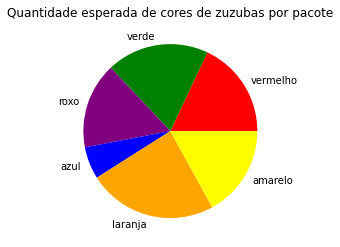

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 4), subplot_kw=dict(aspect="equal"))

mylabels = ["vermelho", "verde", "roxo", "azul", "laranja", "amarelo"]
mycolors = ["red", "green", "purple", "blue", "orange", "yellow"]
y = df_cores['esperado']
ax.pie(df_cores['esperado'], labels = mylabels, colors=mycolors)
ax.set_title("Quantidade esperada de cores de zuzubas por pacote")
plt.show() 

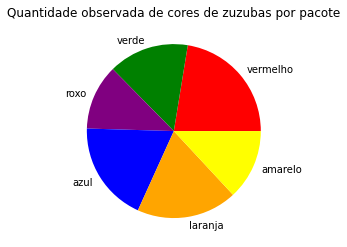

In [27]:
fig, axs = plt.subplots(figsize=(10, 4), subplot_kw=dict(aspect="equal"))

mylabels = ["vermelho", "verde", "roxo", "azul", "laranja", "amarelo"]
mycolors = ["red", "green", "purple", "blue", "orange", "yellow"]
y = df_cores['observado']
axs.pie(df_cores['observado'], labels = mylabels, colors=mycolors)
axs.set_title("Quantidade observada de cores de zuzubas por pacote")
plt.show() 


(ii) Também utilizando R ou Python, teste a hipótese nula de que a alegação do
fabricante é verdadeira, usando nível de significância $\alpha$ = 0,05. Apresente os seguintes valores: graus de liberdade, valor da estatística e o valor-p. Apresente também a sua conclusão, contra ou a favor da hipótese nula,
justificando sua resposta.

In [28]:
conting_tbl = pd.crosstab(df_cores.esperado, df_cores.observado)
conting_tbl

observado,13,14,16,20,24
esperado,,,,,
6,0,0,0,1,0
16,1,0,0,0,0
17,0,1,0,0,0
18,0,0,0,0,1
19,0,0,1,0,0
24,0,0,0,1,0


In [29]:
from scipy.stats import chi2_contingency
chi2_contingency(conting_tbl)

(24.000000000000007,
 0.2423921616705121,
 20,
 array([[0.16666667, 0.16666667, 0.16666667, 0.33333333, 0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.33333333, 0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.33333333, 0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.33333333, 0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.33333333, 0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.33333333, 0.16666667]]))

* Qui-quadrado = 24.000000000000007;
* p-valor = 0.2423921616705121;
* graus de liberdade (20);

Como o p-valor é maior que o nível de significância de 0,05, não temos evidência para rejeitar a hipótese nula de que a alegação do fabricante de que cada pacote produzido contém quantidades de balinhas de
cada cor que não diferem significativamente do encontrado pelo auditor.

## 5.4 Teste $\chi^2$  (III)

Nesta situação problema, temos duas variáveis discretas, uma que indica se
o paciente foi tratado com o medicamento ($treated$ ou $not$-$treated$), e outra que indica se o paciente melhorou ou não ($improved$ ou $not$-$improved$). Utilizando R ou Python, verifique a alegação de que as duas variáveis são dependentes, usando nível de significância $\alpha$ = 0,05.

In [30]:
from google.colab import files
uploaded = files.upload()

Saving treatment.csv to treatment.csv


In [31]:
df_treatment = pd.read_csv('treatment.csv', sep =',')
df_treatment.head()

,id,treatment,improvement
0,1,treated,improved
1,2,treated,improved
2,3,not-treated,improved
3,4,treated,improved
4,5,treated,not-improved


In [34]:
data_crosstab = pd.crosstab(df_treatment['treatment'], df_treatment['improvement'])
data_crosstab

improvement,improved,not-improved
treatment,,
not-treated,26,29
treated,35,15


Calcula-se a proporção total da variável improvement. Caso não exista dependência, esta proporçao deveria se verificar entre os treatments.

In [35]:
(pd.value_counts(df_treatment['improvement'])/len(df_treatment))

improved        0.580952
not-improved    0.419048
Name: improvement, dtype: float64

Calcula-se a proporção total de improvement em cada treatment.

In [36]:
pd.crosstab(df_treatment['treatment'],df_treatment['improvement']).apply(lambda r: r/r.sum(), axis=0)

improvement,improved,not-improved
treatment,,
not-treated,0.42623,0.659091
treated,0.57377,0.340909



* Hipótese Nula: Não há dependência entre as variáveis

* Hipótese Alternativa: Há dependência entre as variáveis


In [37]:
chi2_contingency(data_crosstab)

(4.6625668947297125,
 0.030827072412198585,
 1,
 array([[31.95238095, 23.04761905],
        [29.04761905, 20.95238095]]))

In [39]:
chi2, p, dof, ex = chi2_contingency(data_crosstab)
print(p)

0.030827072412198585


Como o p-valor é menor que o nível de significância de 0,05, temos evidência para rejeitar a hipótese nula de que não há dependência entre as variáveis. Portanto, podemos afirmar que as variáveis $treatment$ e	$improvement$ são dependentes. 

#6 Teste de Permutação

Utilize o teste de permutação para responder à
seguinte pergunta (use nível de significância igual a 5%): O tratamento prolongou a sobrevivência?

As hipóteses nula e alternativa são definidas da seguinte forma:

- $H_0: \mu_{d} = 0$
- $H_a: \mu_{d} \neq 0$

 $\mu_d$ corresponde à diferença entre as médias de tempo de sobrevivência após a cirurgia. 
 
 Das hipóteses definidas, verifica-se que devemos realizar um teste bicaudal.

In [40]:
from google.colab import files
uploaded = files.upload()

Saving mousedata.csv to mousedata.csv


In [41]:
df_mouse = pd.read_csv('mousedata.csv', sep =',')
df_mouse.head()

,lifetime,group
0,94,Treatment
1,197,Treatment
2,16,Treatment
3,38,Treatment
4,99,Treatment


In [42]:
df_mouse.group.unique()

array(['Treatment', 'Control'], dtype=object)

In [44]:
df_mouse.loc[df_mouse['group'] == 'Treatment', 'lifetime'].tolist()

[94, 197, 16, 38, 99, 141, 23]

In [45]:
df_mouse.loc[df_mouse['group'] == 'Control', 'lifetime'].tolist()

[52, 104, 146, 10, 50, 31, 40, 27, 46]

In [47]:
import numpy as np

list_Treatment = df_mouse.loc[df_mouse['group'] == 'Treatment', 'lifetime'].tolist()
list_Control = df_mouse.loc[df_mouse['group'] == 'Control', 'lifetime'].tolist()

agg_list = list_Treatment + list_Control

sample_Treatment = np.array(list_Treatment) 
sample_Control = np.array(list_Control) 
agg_sample = np.array(agg_list) 

print('Média da amostra do grupo de tratamento: ', sample_Treatment.mean())
print('Média da amostra do grupo de controle: ', sample_Control.mean())
print('Média da amostra agregada: ', agg_sample.mean())

observed_difference = np.abs(sample_Treatment.mean() - sample_Control.mean())
print('Diferença observada: ', observed_difference)

Média da amostra do grupo de tratamento:  86.85714285714286
Média da amostra do grupo de controle:  56.22222222222222
Média da amostra agregada:  69.625
Diferença observada:  30.63492063492064


Produzindo diferentes permutações, para cada amostra permutada, é computada a média de tempo de sobrevivência correspondente. Com esses valores, é produzida uma estimativa da distribuição amostral da média.

In [49]:
import random

debug = False

a_perm = list_Treatment + list_Control
num_resamples = 10000
abs_diff = np.zeros(num_resamples)
for i in range(num_resamples):
  random.shuffle(a_perm)
  mean_first_resample = np.array(a_perm[:9]).mean()
  mean_second_resample = np.array(a_perm[9:]).mean()

  if debug:
    print(a_perm)
    print(a_perm[:9])
    print(a_perm[9:])
    print()

  abs_diff[i] = mean_first_resample - mean_second_resample

In [50]:
print(abs_diff[:15])

[ 32.85714286 -27.84126984   6.6984127   16.0952381   11.26984127
  26.76190476  29.80952381 -55.01587302 -12.85714286 -14.12698413
 -33.93650794  -2.44444444   7.71428571 -59.84126984   1.87301587]


Abaixo, o gráfico da distribuição amostral aproximada, com destaque para o valor crítico em ambas as caudas da distribuição (linhas tracejadas em vermelho). O p -valor nesse caso corresponde à proporção de valores da estatística de teste que são iguais ou mais extremos do que o valor observado no par de amostras originais.

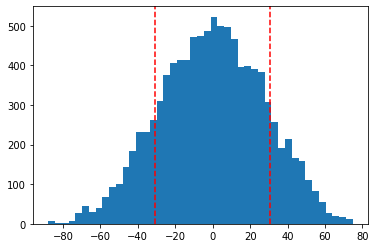

In [52]:
import matplotlib.pyplot as plt

_ = plt.hist(abs_diff, bins='auto')  # arguments are passed to np.histogram
plt.axvline(observed_difference, c='r', linestyle='--');
plt.axvline(-observed_difference, c='r', linestyle='--');

In [51]:
n = np.where(abs_diff > observed_difference)[0].shape[0] + np.where(abs_diff < -observed_difference)[0].shape[0]
n / num_resamples

0.2776

No nível de significância $\alpha =$ 0.05, conclui-se que não podemos rejeitar a hipótese nula, uma vez que $p > \alpha$. Portanto, a aplicação do teste não produziu evidência suficiente que permita afirmar que o tratamento empregado nos camundongos prologou seu tempo de vida. 

#7 *Bootstrap*

O conjunto de dados usado aqui é o denominado
Boston dataset.

In [53]:
from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [55]:
df_boston = pd.read_csv('Boston.csv', sep =',')
df_boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(i) Com base neste conjunto de dados, forneça uma estimativa pontual para a
média populacional de medv. Chame essa estimativa $\hat{\mu}$.


In [56]:
df_boston.shape

(506, 15)

Gerando 1000 reamostras usando o procedimento de amostragem com reposição. Para cada uma dessas reamostras, a estatística de interesse (média) é computada. O gráfico permite visualizar a estimativa da distribuição amostral resultante.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


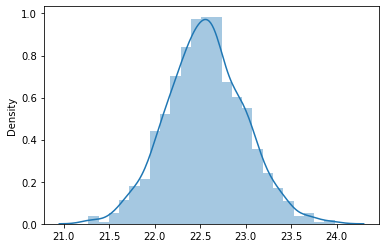

In [57]:
%matplotlib inline
import seaborn as sns
import numpy as np

original_sample = df_boston.medv

# list comprehension
bootstrap_dist = [np.mean(np.random.choice(original_sample, len(df_boston.medv), replace=True)) for _ in range(1000)]

sns.distplot(bootstrap_dist)

In [59]:
import statistics as stats

mu_hat = stats.mean(bootstrap_dist)
print('Estimativa pontual da média populacional de medv: ', mu_hat)

Estimativa pontual da média populacional de medv:  22.559865019762846


(ii) Forneça uma estimativa do erro padrão de $\hat{\mu}$. Interprete o resultado.


Podemos utilizar um dos princípios do Teorema do Limite Central para realizar esta estimativa.

In [62]:
import math
mean_se = np.std(df_boston.medv)/math.sqrt(len(df_boston.medv))
print('Estimativa de erro padrão da estatística sob análise: ', mean_se)

Estimativa de erro padrão da estatística sob análise:  0.4084569346972867


Sabe-se que pelo Teorema do Limite Central, para amostras aleatórias simples de tamanho n retiradas de uma população com média=μ e variância=σ² finita, a distribuição amostral da média tende a ser uma distribuição normal quanto maior for o n, com média=μ e variância=σ²/n. Considerando o valor de n = 1000 utilizado, observa-se que a estimativa de erro padrão apresentou um valor reduzido, o que está de acordo com os ditâmes do TLC.

(iii) Agora estime o erro padrão de $\hat{\mu}$ usando o método Bootstrap. Como essa estimativa se compara com sua resposta de (ii)?


O erro padrão de uma estatística é o desvio padrão de sua distribuição amostral.

In [69]:
se_mean = np.std(bootstrap_dist)
print('Erro padrão computado computado com o método Bootstrap', se_mean)


Erro padrão computado computado com o método Bootstrap 0.4086361889551631


O resultado encontrado para o erro padrão é, de fato, muito próximo ao resultado encontrado com a estimativa realizada no item anterior.

(iv) Com base em sua estimativa de bootstrap de (iii), forneça um intervalo de
confiança de 95% para a média de $medv$. Compare-o com os resultados
obtidos usando t-test sobre o atributo $medv$.


In [79]:
bootstrap_dist = sns.algorithms.bootstrap(original_sample, n_boot=1000, func=np.mean)
ic_lb = np.percentile(bootstrap_dist, 2.5)
ic_ub = np.percentile(bootstrap_dist, 97.5)
print("Intervalo de confiança a 95%%: (%.2f,%.2f)" % (ic_lb, ic_ub))

Intervalo de confiança a 95%: (21.70,23.37)


In [80]:
alfa = 1 - .95

critical_value = np.absolute(norm.ppf(alfa/2))
n = len(df_boston.medv)
errorMargin = critical_value * np.sqrt((mu_hat*(mu_hat-1))/n)
lowerBound = mu_hat - errorMargin
upperBound = mu_hat + errorMargin
print("Intervalo de Confiança a 95%%: (%.2f,%.2f)" % (lowerBound, upperBound))


Intervalo de Confiança a 95%: (20.64,24.48)


Observa-se que os resultados obtidos para o intervalo de confiança usando a técnica bootstrap e usando o t-test não são altamente discrepantes.

(v) Com base neste conjunto de dados, forneça uma estimativa, $\hat{\mu}_{med}$, para a
mediana populacional de medv.


Gerando 1000 reamostras usando o procedimento de amostragem com reposição. Para cada uma dessas reamostras, a estatística de interesse (mediana) é computada. O gráfico permite visualizar a estimativa da distribuição amostral resultante.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


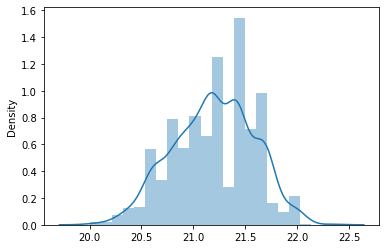

In [66]:
bootstrap_dist_median = [np.median(np.random.choice(original_sample, len(df_boston.medv), replace=True)) for _ in range(1000)]

sns.distplot(bootstrap_dist_median)

In [67]:
mu_hat_med = stats.median(bootstrap_dist_median)
print('Estimativa pontual da mediana populacional de medv: ', mu_hat_med)

Estimativa pontual da mediana populacional de medv:  21.2


(vi) Agora você deve estimar o erro padrão de $\hat{\mu}_{med}$. Infelizmente, não há uma fórmula simples para calcular o erro padrão da mediana. Em vez disso,
estime o erro padrão da mediana usando o método *bootstrap*. Comente
suas descobertas.

In [68]:
se_median = np.std(bootstrap_dist_median)
print('Estimativa de erro padrão para a estimativa pontual da mediana populacional de medv: ', se_median)

Estimativa de erro padrão para a estimativa pontual da mediana populacional de medv:  0.384542322118125


Considerando o número de reamostras geradas para o experimento, uma estimativa de erro de valor baixo é condizente com as estimativas realizadas.